# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Income Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# Moje vypracování:

## Příprava dat

### Import potřebných balíčků

In [1]:
import pandas as pd # Práce s dataframe
import numpy as np # Vědecké výpočty
import matplotlib.pyplot as plt # Vizualizace
import matplotlib.gridspec as gridspec # Mřížka grafů
import matplotlib.ticker as ticker # Mřížka grafů
import seaborn as sns # Vizualizace
import scipy as sp # Statistika

### Načtení datasetů

In [2]:
df1 = pd.read_csv("intakes.csv")
df2 = pd.read_csv("outcomes.csv")
df3 = pd.read_csv("intakes.csv")

### Seznámení se s datasety

#### Intakes:

* počet řádků (záznamů): `138585`
* počet sloupců (příznaků): `12`

In [3]:
print("Počet řádků a počet sloupců datasetu:", df1.shape ,end="")

Počet řádků a počet sloupců datasetu: (138585, 12)

* Všechny sloupce kromě `Name` a `Sex upon Intake` neobsahují (podle statistik) nulová data (hodnotu `np.NaN` nebo `None`).
* Všechny sloupce mají datový typ `object - string`.

In [4]:
df1.info() # základní informace

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Sloupec #0   `Animal ID`
> Význam: `Identifikátor zvířete`                       
> Unikátních hodnot: `123890`                   
> Typ příznaku: `text`  

Sloupec #1   `Name`              
> Význam: `Jméno zvířete`                       
> Unikátních hodnot: `23544`                                
> Typ příznaku: `text`

Sloupec #2   `DateTime`          
> Význam: `Datum a čas přijetí do útulku`             
> Unikátních hodnot: `97442`                                
> Typ příznaku: `numerický - intervalový`

Sloupec #3   `MonthYear`         
> Význam: `Měsíc a rok přijetí do útulku`       
> Unikátních hodnot: `103`                                
> Typ příznaku: `numerický - diskrétní`

Sloupec #4   `Found Location`    
> Význam: `Místo nalezení zvířete`              
> Unikátních hodnot: `58367`                                
> Typ příznaku: `text`

Sloupec #5   `Intake Type`       
> Význam: `Důvod přijetí`                       
> Unikátních hodnot: `6`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #6   `Intake Condition`  
> Význam: `Zdravotní stav zvířete při přijetí`  
> Unikátních hodnot: `15`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #7   `Animal Type`       
> Význam: `Druh zvířete`                        
> Unikátních hodnot: `5`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #8   `Sex upon Intake`   
> Význam: `Pohlaví zvířete při přijetí`         
> Unikátních hodnot: `5`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #9   `Age upon Intake`   
> Význam: `Věk zvířete při přijetí`             
> Unikátních hodnot: `54`                                
> Typ příznaku: `numerický - diskrétní`

Sloupec #10  `Breed`             
> Význam: `Rasa`                                
> Unikátních hodnot: `2741`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #11  `Color`             
> Význam: `Barva`                               
> Unikátních hodnot: `616`                                
> Typ příznaku: `kategorický - nominální`              

In [5]:
df1.describe() # základní statistiky

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


In [6]:
df1.head(3) # zobrazení 3 prvních hodnot

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White


In [7]:
type(df1["Animal ID"].loc[0]) # zjištění datového typu sloupce

str

#### Outcomes

* počet řádků (záznamů): 138769
* počet sloupců (příznaků): 12

In [8]:
print("Počet řádků a počet sloupců datasetu:", df2.shape ,end="")

Počet řádků a počet sloupců datasetu: (138769, 12)

* Sloupce `Name, Outcome type, Outcome Subtype, Sex upon Outcome a Age upon Outcome` obsahují nulová data (hodnotu `np.NaN` nebo `None`).
* Všechny sloupce mají datový typ `object - string`.

In [9]:
df2.info() # základní informace

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Sloupec #0   `Animal ID`        
> Význam: `Identifikátor zvířete`                
> Unikátních hodnot: `124068`                                
> Typ příznaku: `text`

Sloupec #1   `Name`              
> Význam: `Jméno zvířete`                       
> Unikátních hodnot: `23425`                                
> Typ příznaku: `text`

Sloupec #2   `DateTime`          
> Význam: `Datum a čas propuštění z útulku`             
> Unikátních hodnot: `115364`                                
> Typ příznaku: `numerický - intervalový`

Sloupec #3   `MonthYear`         
> Význam: `Měsíc a rok propuštění z útulku`       
> Unikátních hodnot: `103`                                
> Typ příznaku: `numerický - diskrétní`

Sloupec #4   `Date of Birth`    
> Význam: `Datum narození zvířete`              
> Unikátních hodnot: `7576`                                
> Typ příznaku: `numerický - diskrétní`

Sloupec #5   `Outcome Type`       
> Význam: `Druh propuštění`                       
> Unikátních hodnot: `9`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #6   `Outcome Subtype`  
> Význam: `Důvod propuštění`  
> Unikátních hodnot: `26`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #7   `Animal Type`       
> Význam: `Druh zvířete`                        
> Unikátních hodnot: `5`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #8   `Sex upon Outcome`   
> Význam: `Pohlaví zvířete po propuštění`         
> Unikátních hodnot: `5`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #9   `Age upon Outcome`   
> Význam: `Věk zvířete po propuštění`             
> Unikátních hodnot: `54`                                
> Typ příznaku: `numerický - diskrétní`

Sloupec #10  `Breed`             
> Význam: `Rasa`                                
> Unikátních hodnot: `2749`                                
> Typ příznaku: `kategorický - nominální`

Sloupec #11  `Color`             
> Význam: `Barva`                               
> Unikátních hodnot: `619`                                
> Typ příznaku: `kategorický - nominální`

In [10]:
df2.describe() # základní statistiky

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


In [11]:
df2.head(3) # zobrazení 3 prvních hodnot

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray


In [12]:
# zobrazení prvního zvířete z Outcomes v datasetu Intakes (pro porovnání zvířete v obou datasetech)
df1[df1["Animal ID"] == df2["Animal ID"].loc[0]]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
10992,A794011,Chunk,05/02/2019 04:51:00 PM,May 2019,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White


### Vyčištění a zkonvertování dat

#### Nulová data

* Nulová data jsou reprezentovaná hodnotou `NaN`
* V žádném sloupci se `nenachází` řádek s `prázdným řetězcem`
* Ve sloupcích `Name`, `Sex upon Intake` a `Breed` obou dataframů se nacházejí hodnoty `Unknown`

In [13]:
# Intakes
print("Výběr sloupců s \"Unknown\" hodnotami:")
display((df1 == "Unknown").any())

Výběr sloupců s "Unknown" hodnotami:


Animal ID           False
Name                 True
DateTime            False
MonthYear           False
Found Location      False
Intake Type         False
Intake Condition    False
Animal Type         False
Sex upon Intake      True
Age upon Intake     False
Breed                True
Color               False
dtype: bool

In [14]:
# Intakes
print("Počet nulových hodnot před nahrazením \"Unknown\" za np.NaN:")
display(df1.isnull().sum())
df1 = df1.replace('Unknown', np.nan)
print("Počet nulových hodnot po nahrazení \"Unknown\" za np.NaN:")
display(df1.isnull().sum())

Počet nulových hodnot před nahrazením "Unknown" za np.NaN:


Animal ID               0
Name                41269
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

Počet nulových hodnot po nahrazení "Unknown" za np.NaN:


Animal ID               0
Name                41288
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake     11070
Age upon Intake         0
Breed                   3
Color                   0
dtype: int64

In [15]:
# Outcomes
print("Výběr sloupců s \"Unknown\" hodnotami:")
display((df2 == "Unknown").any())

Výběr sloupců s "Unknown" hodnotami:


Animal ID           False
Name                 True
DateTime            False
MonthYear           False
Date of Birth       False
Outcome Type        False
Outcome Subtype     False
Animal Type         False
Sex upon Outcome     True
Age upon Outcome    False
Breed                True
Color               False
dtype: bool

In [16]:
# Outcomes
print("Počet nulových hodnot před nahrazením \"Unknown\" za np.NaN:")
display(df2.isnull().sum())
df2 = df2.replace('Unknown', np.nan)
print("Počet nulových hodnot po nahrazení \"Unknown\" za np.NaN:")
display(df2.isnull().sum())

Počet nulových hodnot před nahrazením "Unknown" za np.NaN:


Animal ID               0
Name                41255
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

Počet nulových hodnot po nahrazení "Unknown" za np.NaN:


Animal ID               0
Name                41274
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75334
Animal Type             0
Sex upon Outcome    11053
Age upon Outcome        5
Breed                   3
Color                   0
dtype: int64

In [17]:
print("Počet prázdných řetězců v datasetu:", (df1 == "").any().sum())

Počet prázdných řetězců v datasetu: 0


In [18]:
print("Počet prázdných řetězců v datasetu:", (df2 == "").any().sum())

Počet prázdných řetězců v datasetu: 0


#### Konverze kategorických příznaků

* žádný kategorický příznak není ordinální, proto stačí provést automatickou konverzi

In [19]:
# Intakes
category_cols1 = ["Intake Type", "Intake Condition", "Animal Type", "Sex upon Intake", "Breed", "Color"] # výběr kategorických sloupců
df1[category_cols1] = df1[category_cols1].astype('category') # konverze na category
print("Zobrazení výsledku po konverzi:")
df1.info()

Zobrazení výsledku po konverzi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138585 non-null  object  
 1   Name              97297 non-null   object  
 2   DateTime          138585 non-null  object  
 3   MonthYear         138585 non-null  object  
 4   Found Location    138585 non-null  object  
 5   Intake Type       138585 non-null  category
 6   Intake Condition  138585 non-null  category
 7   Animal Type       138585 non-null  category
 8   Sex upon Intake   127515 non-null  category
 9   Age upon Intake   138585 non-null  object  
 10  Breed             138582 non-null  category
 11  Color             138585 non-null  category
dtypes: category(6), object(6)
memory usage: 7.5+ MB


In [20]:
# Outcomes
category_cols2 = ["Outcome Type", "Outcome Subtype", "Animal Type", "Sex upon Outcome", "Breed", "Color"] # výběr kategorických sloupců
df2[category_cols2] = df2[category_cols2].astype('category') # konverze na category
print("Zobrazení výsledku po konverzi:")
df2.info()

Zobrazení výsledku po konverzi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138769 non-null  object  
 1   Name              97495 non-null   object  
 2   DateTime          138769 non-null  object  
 3   MonthYear         138769 non-null  object  
 4   Date of Birth     138769 non-null  object  
 5   Outcome Type      138746 non-null  category
 6   Outcome Subtype   63435 non-null   category
 7   Animal Type       138769 non-null  category
 8   Sex upon Outcome  127716 non-null  category
 9   Age upon Outcome  138764 non-null  object  
 10  Breed             138766 non-null  category
 11  Color             138769 non-null  category
dtypes: category(6), object(6)
memory usage: 7.5+ MB


#### Konverze příznaku `Age upon` na numerický příznak

In [21]:
print("Analýza hodnot v prvním datasetu:")
display(df1["Age upon Intake"].sort_values().unique())
print("Analýza hodnot v druhém datasetu:")
df2["Age upon Outcome"].sort_values().unique()

Analýza hodnot v prvním datasetu:


array(['-1 years', '-2 years', '-3 years', '0 years', '1 day', '1 month',
       '1 week', '1 weeks', '1 year', '10 months', '10 years',
       '11 months', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '2 days', '2 months', '2 weeks', '2 years', '20 years', '21 years',
       '22 years', '23 years', '24 years', '25 years', '28 years',
       '3 days', '3 months', '3 weeks', '3 years', '30 years', '4 days',
       '4 months', '4 weeks', '4 years', '5 days', '5 months', '5 weeks',
       '5 years', '6 days', '6 months', '6 years', '7 months', '7 years',
       '8 months', '8 years', '9 months', '9 years'], dtype=object)

Analýza hodnot v druhém datasetu:


array(['-1 years', '-2 years', '-3 years', '0 years', '1 day', '1 month',
       '1 week', '1 weeks', '1 year', '10 months', '10 years',
       '11 months', '11 years', '12 years', '13 years', '14 years',
       '15 years', '16 years', '17 years', '18 years', '19 years',
       '2 days', '2 months', '2 weeks', '2 years', '20 years', '21 years',
       '22 years', '23 years', '24 years', '25 years', '28 years',
       '3 days', '3 months', '3 weeks', '3 years', '30 years', '4 days',
       '4 months', '4 weeks', '4 years', '5 days', '5 months', '5 weeks',
       '5 years', '6 days', '6 months', '6 years', '7 months', '7 years',
       '8 months', '8 years', '9 months', '9 years', nan], dtype=object)

In [22]:
# funkce vracející počet let daného časového údaje
from curses.ascii import isalpha

def get_days (value:str):
    if type(value) == float: # ošetření nan
        return -1
    if type(value) != str: # ošetření puštění funkce podruhé
        return value
    tmp = value.split() # rozdělení na číslo a časový údaj
    val = int(tmp[0])
    scale = tmp[1]
    if scale.startswith("day"):
        return val//365
    if scale.startswith("week"):
        return val//53
    if scale.startswith("month"):
        return val//12
    if scale.startswith("year"):
        return val

In [23]:
# Přepočet všech hodnot v Age upon na počet let
# Intakes
df1["Age upon Intake"] = df1["Age upon Intake"].apply(lambda x: get_days(x))
print("Výsledek operace:")
df1["Age upon Intake"].sort_values().unique()

Výsledek operace:


array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 30])

In [24]:
# Outcomes
df2["Age upon Outcome"] = df2["Age upon Outcome"].apply(lambda x: get_days(x))
print("Výsledek operace:")
df2["Age upon Outcome"].sort_values().unique() # výsledek operace

Výsledek operace:


array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 30])

#### Konverze `DateTime` na datetime64

In [25]:
# Intake
df1["DateTime"] = pd.to_datetime(df1["DateTime"]) # konverze datového typu
print("Zobrazení výsledku:")
df1["DateTime"].info()

Zobrazení výsledku:
<class 'pandas.core.series.Series'>
RangeIndex: 138585 entries, 0 to 138584
Series name: DateTime
Non-Null Count   Dtype         
--------------   -----         
138585 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [26]:
# Outcomes
df2["DateTime"] = pd.to_datetime(df2["DateTime"])
print("Zobrazení výsledku:")
df2["DateTime"].info()

Zobrazení výsledku:
<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: DateTime
Non-Null Count   Dtype         
--------------   -----         
138769 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


### Moje úpravy:

#### Konverze sloupce  `Date of Birth` na typ datetime64

In [27]:
df2["Date of Birth"] = pd.to_datetime(df2["Date of Birth"])
print("Zobrazení výsledku:")
df2["Date of Birth"].info()

Zobrazení výsledku:
<class 'pandas.core.series.Series'>
RangeIndex: 138769 entries, 0 to 138768
Series name: Date of Birth
Non-Null Count   Dtype         
--------------   -----         
138769 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


#### Náhrada sloupce `MonthYear` za `ordinální` `numerický` příznak
* Rok je identický s datumem přijetí/propuštění, proto ho lze `vynechat`

In [28]:
# Intakes
df1["MonthYear"] = pd.DatetimeIndex(df1["DateTime"]).month # výběr měsíce z příznaku DateTime a použití jeho numerické podoby ve sloupci MonthYear
print("Kontrola typu sloupce MonthYear:", df1["MonthYear"].dtype)
print("Zobrazení výsledku:")
df1["MonthYear"].sort_values().unique()

Kontrola typu sloupce MonthYear: int64
Zobrazení výsledku:


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
# Outcomes
df2["MonthYear"] = pd.DatetimeIndex(df2["DateTime"]).month
print("Kontrola typu sloupce MonthYear:", df2["MonthYear"].dtype)
print("Zobrazení výsledku:")
df2["MonthYear"].sort_values().unique() # výsledek

Kontrola typu sloupce MonthYear: int64
Zobrazení výsledku:


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### Vymazání nevalidních dat

In [30]:
# Intakes
before = df1.shape # počet řádků před změnou
invalid = df1[df1["Age upon Intake"] < 0] # filtr záporných let
print("Počet nevalidních záznamů:", invalid["Age upon Intake"].count())
df1 = df1.drop(invalid.index , axis='index') # odebrání nevalidních záznamů
print("Počet odebraných řádek:", before[0] - df1.shape[0]) # počet různých řádek před a po změně

Počet nevalidních záznamů: 8
Počet odebraných řádek: 8


In [31]:
# Outcomes
nul = df2[df2["Age upon Outcome"].isnull()] # řádky s null hodnotou, na které nelze aplikovat .drop()
tmp = df2[df2["Age upon Outcome"].notnull()] # řádky bez null hodnoty, na které aplikujeme .drop()
before = df2.shape # počet řádků před změnou
invalid = tmp[tmp["Age upon Outcome"] < 0] # filtr záporných let
print("Počet nevalidních záznamů:", invalid["Age upon Outcome"].count())
df2 = df2.drop(invalid.index , axis='index') # odebrání nevalidních záznamů
print("Počet odebraných řádek:", before[0] - df2.shape[0]) # počet různých řádek před a po změně

Počet nevalidních záznamů: 13
Počet odebraných řádek: 13


#### Smazání duplicit

In [32]:
# Intakes
before = df1.shape # Porovnání dataframu před a po odebrání duplicit
df1 = df1.drop_duplicates()
print("Počet odebraných duplicit:", before[0] - df1.shape[0])

Počet odebraných duplicit: 20


In [33]:
# Outcomes
before = df2.shape # Porovnání dataframu před a po odebrání duplicit
df2 = df2.drop_duplicates()
print("Počet odebraných duplicit:", before[0] - df2.shape[0])

Počet odebraných duplicit: 17


# Deskriptivní statistika

### Age upon Intake

* je příznak numerický, proto je vhodnou volbou vizualizace histogram a popisuji ho jako kvantitativní data

> Průměr: 1.93                 
> Standardní odchylka: 2.91                            
> Minimum: 0.0                            
> Maximum: 30.0                            
> Medián: 1.0                     
> Dolní kvartil: 0.0                           
> Horní kvartil: 2.0                           

In [34]:
df1["Age upon Intake"].describe()

count    138557.000000
mean          1.929509
std           2.918097
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          30.000000
Name: Age upon Intake, dtype: float64

* graf rozdělení hodnot připomíná lineární lomenou funkci
* z toho můžeme odhadovat, že do útulku se dostávají víc mladší zvířata, než starší

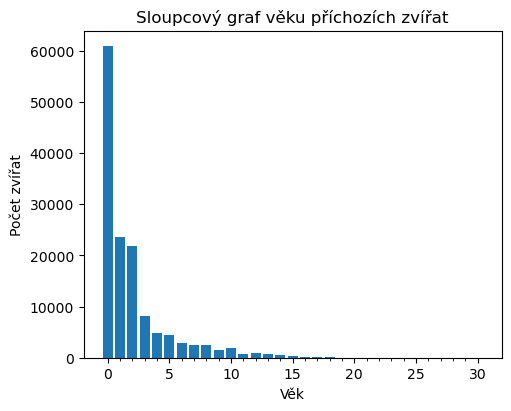

In [35]:
tmp = df1["Age upon Intake"].value_counts()
# nastavení figure
fig = plt.figure(figsize=(5, 4), facecolor='white', constrained_layout=True)
# přidání místa pro graf
ax = fig.add_subplot(1, 1, 1)
# graf
ax.bar(tmp.index, tmp.values)
# popisky grafu
ax.set_title("Sloupcový graf věku příchozích zvířat")
ax.set_xlabel("Věk")
ax.set_ylabel("Počet zvířat")
# nastavení adekvátní četnosti hlavních a vedlejších značek
locator2 = ticker.FixedLocator([i for i in range(30)])
ax.xaxis.set_minor_locator(locator2)

### DateTime

* je příznak numerický, proto je vhodnou volbou vizualizace sloupcový graf, protože roky jsou diskrétní a popisuji ho jako kvantitativní data
* pro vyšší relevanci popisuji pouze roky

    Celé datumy                               
> Nejstarší datum: 2013-10-01 07:51:00                  
> Nejnovější datum: 2022-04-27 07:54:00                  
> Rozsah hodnot: 7 let, 6 měsíců a 26 dní

In [36]:
df1["DateTime"].describe()

/tmp/ipykernel_1460/2220327930.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1["DateTime"].describe()


count                  138557
unique                  97438
top       2014-07-09 12:58:00
freq                       63
first     2013-10-01 07:51:00
last      2022-04-27 07:54:00
Name: DateTime, dtype: object

    Roky                                   
> Průměr: 2017     
> Standardní odchylka: 2.4                   
> Medián: 2017                      
> Dolní kvartil: 2015                           
> Horní kvartil: 2019                           


In [37]:
# vynětí roku u záznamů
years = pd.Series(pd.DatetimeIndex(df1["DateTime"]).year)
years.describe()

count    138557.000000
mean       2017.165080
std           2.380064
min        2013.000000
25%        2015.000000
50%        2017.000000
75%        2019.000000
max        2022.000000
Name: DateTime, dtype: float64

* podle histogramu rozložení hodnot poznáme, že počet přijatých zvířat byl konstantní do roku 2020, od které se roční příjem zvířat propadl o 6-8 tisíc.
* krajní meze (rok 2013 a 2022) jsou neúplné, proto jsou hodnoty mnohem menší

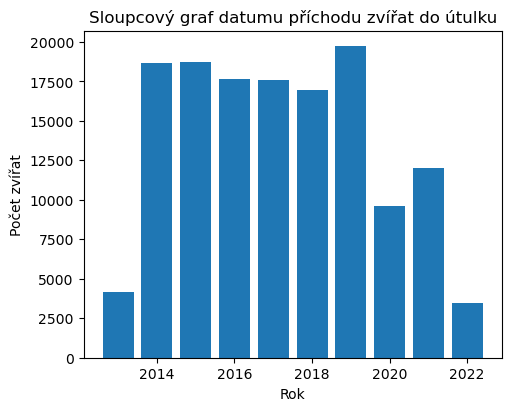

In [38]:
tmp = years.value_counts()
# nastavení figure
fig = plt.figure(figsize=(5, 4), facecolor='white', constrained_layout=True)
# přidání místa pro graf
ax = fig.add_subplot(1, 1, 1)
# graf
ax.bar(tmp.index, tmp.values)
# popisky grafu
ax.set_title("Sloupcový graf datumu příchodu zvířat do útulku")
ax.set_xlabel("Rok")
ax.set_ylabel("Počet zvířat")
# nastavení adekvátní četnosti hlavních a vedlejších značek
locator2 = ticker.FixedLocator([i for i in range(30)])
ax.xaxis.set_minor_locator(locator2)
# smazání zbytečných ohraničení

### Další tři příznaky

#### Animal Type

* Počet unikátních hodnot: 5
* Modus: Dog

In [39]:
print("Počet unikátních hodnot:", df1["Animal Type"].nunique())

Počet unikátních hodnot: 5


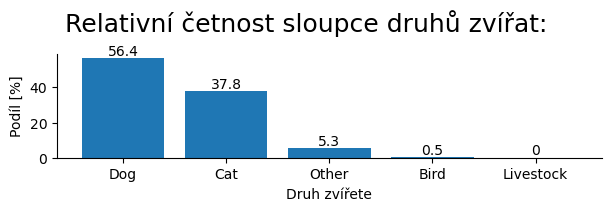

In [40]:
tmp = df1["Animal Type"].value_counts()

portion = [ round(x / sum(tmp.values) *100, 1) for x in tmp.values if x / sum(tmp.values) *100 ]
labels = [ x for x in tmp.index ]
# nastavení figure
fig = plt.figure(figsize=(6,2), facecolor='white', constrained_layout=True)
fig.suptitle("Relativní četnost sloupce druhů zvířat:", fontsize=18)
ax = fig.add_subplot()
# graf
react = ax.bar(labels, portion, width=0.8)
# popisky grafu
ax.bar_label(react)
ax.set_xlabel("Druh zvířete")
ax.set_ylabel("Podíl [%]")
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

In [41]:
print("Tabulka četností druhu zvířat přijatých do útulku:")
tmp

Tabulka četností druhu zvířat přijatých do útulku:


Dog          78127
Cat          52373
Other         7372
Bird           661
Livestock       24
Name: Animal Type, dtype: int64

In [42]:
print("Modus:", sp.stats.mode(df1["Animal Type"]))

Modus: ModeResult(mode=array(['Dog'], dtype=object), count=array([78127]))


#### Outcome Type

* Počet unikátních hodnot: 9
* Modus: Adopce

In [43]:
print("Počet unikátních hodnot:", df2["Outcome Type"].nunique())

Počet unikátních hodnot: 9


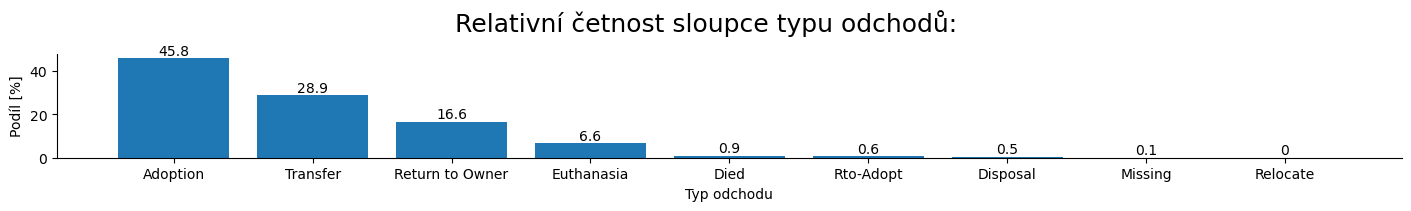

In [44]:
tmp = df2["Outcome Type"].value_counts()

portion = [ round(x / sum(tmp.values) *100, 1) for x in tmp.values if x / sum(tmp.values) *100 ]
labels = [ x for x in tmp.index ]
# nastavení figure
fig = plt.figure(figsize=(14,2), facecolor='white', constrained_layout=True)
fig.suptitle("Relativní četnost sloupce typu odchodů:", fontsize=18)
ax = fig.add_subplot()
# graf
react = ax.bar(labels, portion, width=0.8)
# popisky grafu
ax.bar_label(react)
ax.set_xlabel("Typ odchodu")
ax.set_ylabel("Podíl [%]")
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

In [45]:
print("Tabulka četností druhu zvířat přijatých do útulku:")
tmp

Tabulka četností druhu zvířat přijatých do útulku:


Adoption           63513
Transfer           40158
Return to Owner    23015
Euthanasia          9131
Died                1301
Rto-Adopt            873
Disposal             628
Missing               72
Relocate              25
Name: Outcome Type, dtype: int64

In [46]:
print("Modus:", sp.stats.mode(df2["Outcome Type"]))

Modus: ModeResult(mode=array(['Adoption'], dtype=object), count=array([63513]))


#### Age upon Outcome

> Průměr: 1.95                 
> Směrodatná odchylka: 2.93                            
> Minimum: 0.0                             
> Maximum: 30.0               
> Medián: 1.0                     
> Dolní kvartil: 0.0                           
> Horní kvartil: 2.0                           

In [47]:
df2["Age upon Outcome"].describe()

count    138739.000000
mean          1.953185
std           2.939930
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          30.000000
Name: Age upon Outcome, dtype: float64

* histogram i statistiky věku zvířat opuštějících útulek jsou téměr totožné
* ze statistiky můžeme odhadovat, že zvíře zůstává v útulku průměrně 0.02 roku tedy zhruba týden

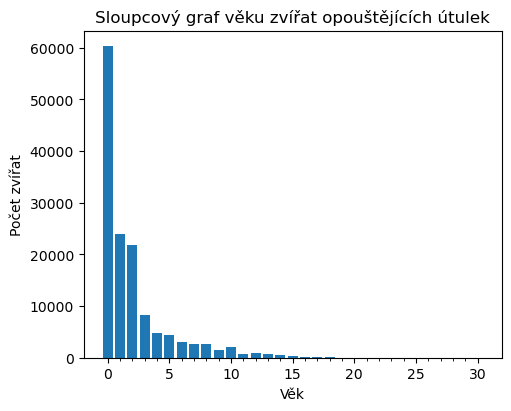

In [48]:
tmp = df2["Age upon Outcome"].value_counts()
# nastavení figure
fig = plt.figure(figsize=(5, 4), facecolor='white', constrained_layout=True)
# přidání místa pro graf
ax = fig.add_subplot(1, 1, 1)
# graf
ax.bar(tmp.index, tmp.values)
# popisky grafu
ax.set_title("Sloupcový graf věku zvířat opouštějících útulek")
ax.set_xlabel("Věk")
ax.set_ylabel("Počet zvířat")
# nastavení adekvátní četnosti hlavních a vedlejších značek
locator2 = ticker.FixedLocator([i for i in range(30)])
ax.xaxis.set_minor_locator(locator2)

### Korelace mezi dvěma příznaky

Outcome Type a Sex upon Outcome

* pro vizualizaci korelaci mezi těmito příznaky používám funkci ze cvičení
* z grafuje je patrné, že korelace tam existuje - U kastrovaných zvířat je vysoký podíl adoptovaných zvířat a u nekastrovaných zvířat převažuje typ odchodu přemístění
* tuto myšlenku dále rozvíjím v jedné z mých otázek

In [49]:
# bivariate descriptive statistics for two categorical variables
def bivariate_cat_cat_ds(df, categorical1, categorical2):
    frequency_table = pd.crosstab(df[categorical1], df[categorical2])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax1)
    sns.heatmap(frequency_table.div(len(df)), cmap='Blues', annot=True, fmt='g', ax=ax2)

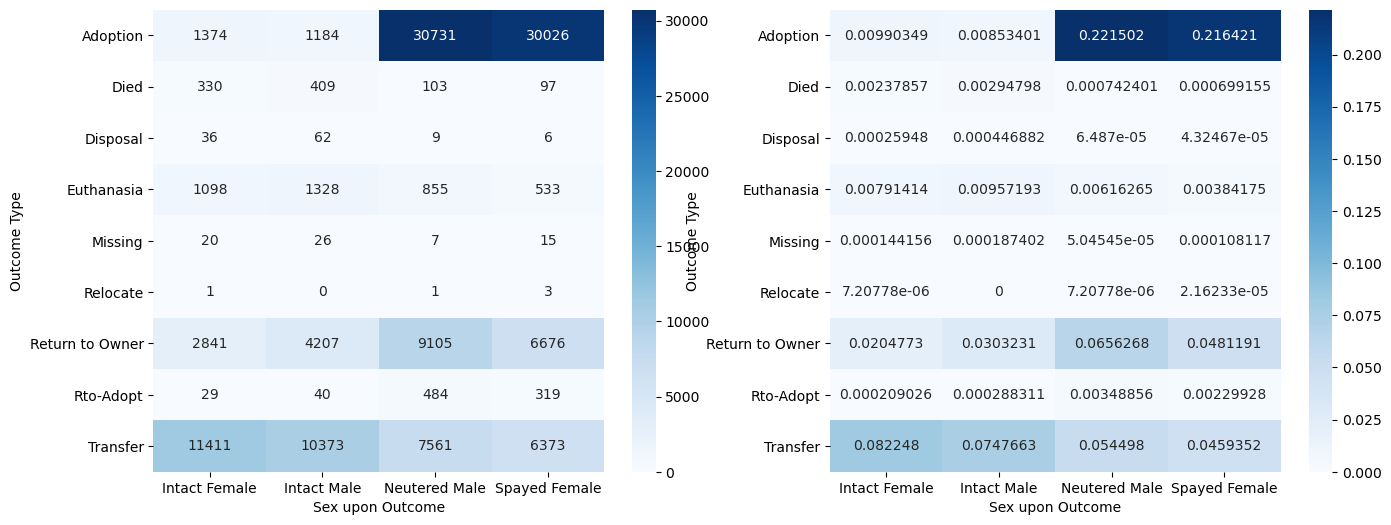

In [50]:
bivariate_cat_cat_ds(df2, 'Outcome Type', 'Sex upon Outcome')

# Zadané Otázky

#### 1, Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

* Ano. Z grafů vidíme, že typ odchodu závisí na typu příchodu. Každému typu příchodu dominuje nějaký typ odchodu a není to vždy ten stejný.
* Adopce dominuje u psů odevzdaných majiteli, zbloudilých a opuštěných. U všech těchto druhů příchodů je i vyšší zastoupení přesunu zvířete do jiného útulku.
* U divokých psů je téměr 90% asistovaná smrt. U žádosti o asistovanou smrt nepřekvapivě dominuje asistovaná smrt, přesto je poměr takových výkonů menší než u divokých psů.
* U psů sloužících veřejnosti je nejvyšší zastoupení vrácení majiteli.

In [51]:
# musím spojit datasety a ponechat analyzované sloupce
tmp = df1.drop_duplicates(subset="Animal ID")[["Animal ID", "Intake Type"]].dropna()
tmp2 = df2.drop_duplicates(subset="Animal ID")[["Animal ID", "Outcome Type"]].dropna()
concat = tmp.merge(tmp2, on=["Animal ID"]).drop(["Animal ID"], axis=1)

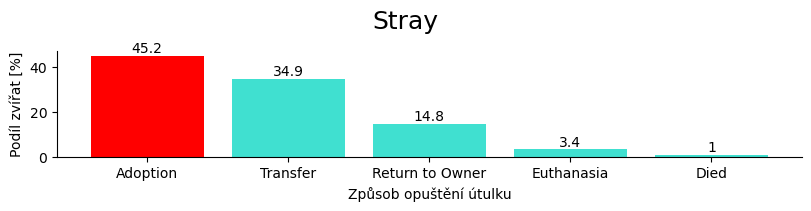

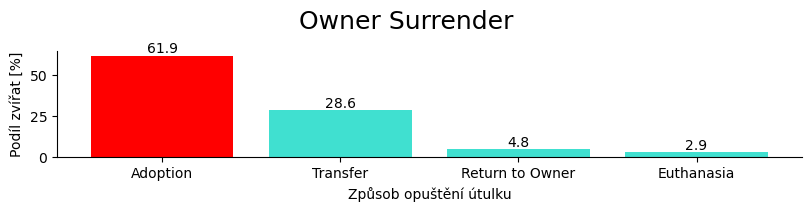

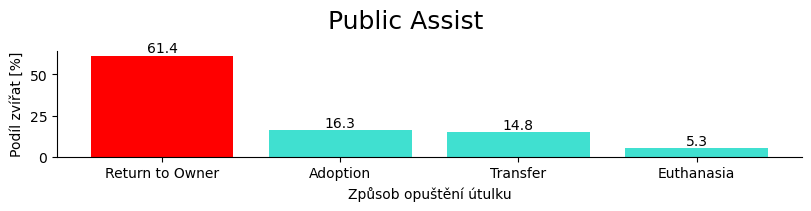

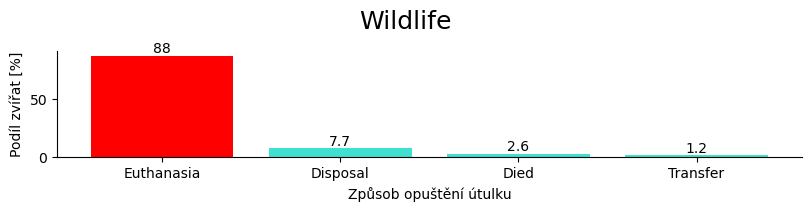

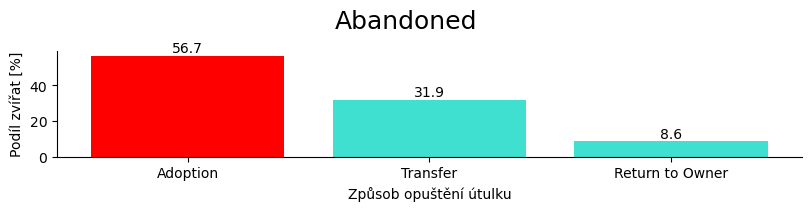

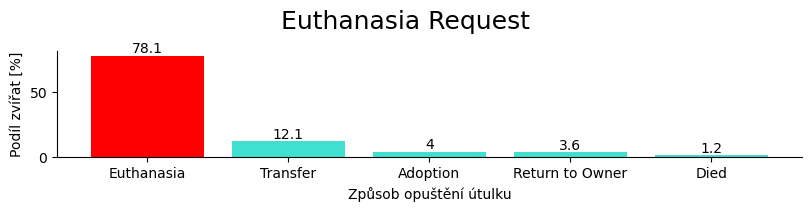

In [52]:
# zobrazení typů odchodů pro různé typy příchodů
val = ['Stray', "Owner Surrender", "Public Assist", "Wildlife", "Abandoned", "Euthanasia Request"]
# vykreslení grafu pro každý typ příchodu zvířete
for i in range(len(val)):
    # ponechání pouze hodnot pro daný typ příchodu
    tmp = concat[concat["Intake Type"] == val[i]]
    # ponechání pouze sloupce Outcome Type a ohodnocení každého typu
    tmp = tmp.drop(["Intake Type"], axis=1).value_counts()
    # uložení popisku osy x a převod počtu zvířat na procentuální zastoupení, vynechání hodnot menších než 1%
    portion = [ round(x / sum(tmp.values) *100, 1) for x in tmp.values if x / sum(tmp.values) *100 > 1 ]
    labels = [ x[0] for x in tmp.index[:len(portion)] ]
    # nastavení figure
    fig = plt.figure(figsize=(8,2), facecolor='white', constrained_layout=True)
    fig.suptitle(val[i], fontsize=18)
    ax = fig.add_subplot()
    # graf
    colors = [ 'turquoise' for i in range(len(labels)-1)  ]
    react = ax.bar(labels, portion, color=['red']+colors, width=0.8)
    # popisky grafu
    ax.bar_label(react)
    ax.set_xlabel("Způsob opuštění útulku")
    ax.set_ylabel("Podíl zvířat [%]")
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)

#### 2, Hraje věk zvířete roli při adopci?

* Ano. Z prvního grafu je jasně vidět, že největší šance adopce je u mláďat a to nejvíc u těch mladších než 1 rok. Od stáří 10 let klesá poměr adoptovaných význačněji.

* Přesto rozdíly v jednotlivých letech nejsou nějak závratně různé. Jak je vidět z mého druhého grafu, křivka popisující trend počtu zvířat opouštějících útulek je podobná křivce trendu počtu adoptovaných zvířat.

In [53]:
# výběr adoptovaných zvířat
adopt = df2[df2["Outcome Type"] == "Adoption"]["Age upon Outcome"].value_counts().sort_values()
# nejvyšší věk v množině adoptovaných zvířat
max_age = max(df2[df2["Outcome Type"] == "Adoption"]["Age upon Outcome"].unique())
# výběr všech zvířat
all = df2[df2["Age upon Outcome"] <= max_age]["Age upon Outcome"].value_counts().sort_values()

In [54]:
# podíly adoptovaných zvířat daného věku ku všem zvířatům daného věku
portion = [(adopt.values[i] / all.values[j])*100 for i in range(len(adopt.values)) for j in range(len(all.values)) if i == j]

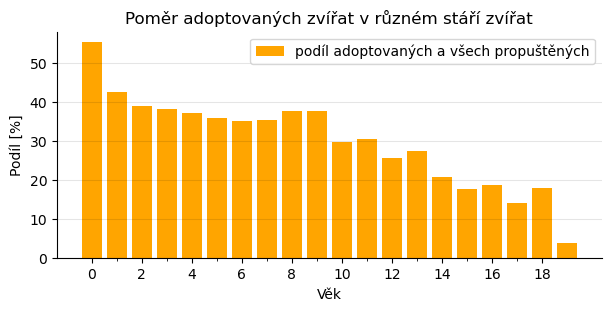

In [55]:
# nastavení figure
fig = plt.figure(figsize=(6,3), facecolor='white', constrained_layout=True)
# přidání místa pro graf
ax = fig.add_subplot()
# graf
ax.bar(all.index, portion, color='orange')
# popisky grafu
ax.set_title("Poměr adoptovaných zvířat v různém stáří zvířat")
ax.set_xlabel("Věk")
ax.set_ylabel("Podíl [%]")
# nastavení adekvátní četnosti hlavních a vedlejších značek
locator1 = ticker.FixedLocator([i for i in range(max_age) if i % 2 == 0])
locator2 = ticker.FixedLocator([i for i in range(max_age)])
locator3 = ticker.FixedLocator([i for i in range(0, 60, 10)])
ax.xaxis.set_major_locator(locator1)
ax.xaxis.set_minor_locator(locator2)
ax.yaxis.set_major_locator(locator3)
# přidání legendy a mřížky
ax.legend(['podíl adoptovaných a všech propuštěných'], loc='upper right')
ax.grid(axis='y', color='black', alpha=.1)
# smazání zbytečných ohraničení
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

* Na grafu vidíme, že trend počtu všech propuštěných zvířat se zvyšujícím se věkem je velmi podobný trendu počtu adoptovanýách zvířat

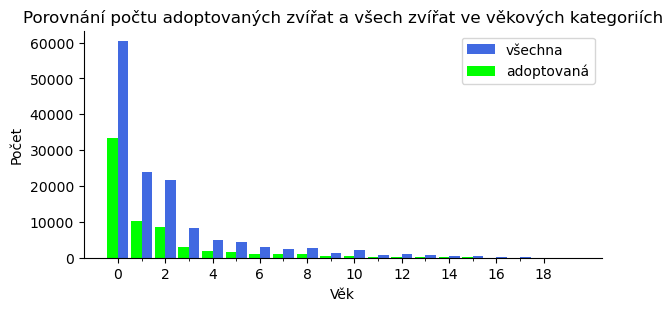

In [56]:
# nastavení figure
fig = plt.figure(figsize=(6,3), facecolor='white', constrained_layout=True)
# přidání místa pro graf
ax = fig.add_subplot()
width = 0.45 # šířka sloupce grafu
# graf 1 - všechna zvířata
ax.bar(all.index+(width/2), all.values, color='royalblue', width=width)
# graf 2 - adoptovaná zvířata
ax.bar(adopt.index-(width/2), adopt.values, color='lime', width=width)
# popisky grafu
ax.set_title("Porovnání počtu adoptovaných zvířat a všech zvířat ve věkových kategoriích")
ax.set_xlabel("Věk")
ax.set_ylabel("Počet")
# nastavení adekvátní četnosti hlavních a vedlejších značek
locator1 = ticker.FixedLocator([i for i in range(max_age) if i % 2 == 0])
locator2 = ticker.FixedLocator([i for i in range(max_age)])
ax.xaxis.set_major_locator(locator1)
ax.xaxis.set_minor_locator(locator2)
# přidání legendy
ax.legend(['všechna', 'adoptovaná'], loc='upper right')
# smazání zbytečných ohraničení
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

#### 3, Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

* Z grafu je patrné, že mezi květnem a říjnem je příjem zvířat do útulku mírně větší než ve zbytku roku, přičemž největší je v květnu, červnu a říjnu.
* Nejmenší vypětí v příjmu nových zvířat do útulku je v únoru.

In [57]:
# popisek osy x
label = ["", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# počet hodnot na ose x
unit = np.arange(len(label))
# uložení počtu příjmů zvířat v jednotlivých měsících
months = df1["MonthYear"].value_counts().sort_values()
# procenta přijatých zvířat v daném měsíci z celého roku
portion = [ round(x / sum(months.values) *100, 1) for x in months.values ]

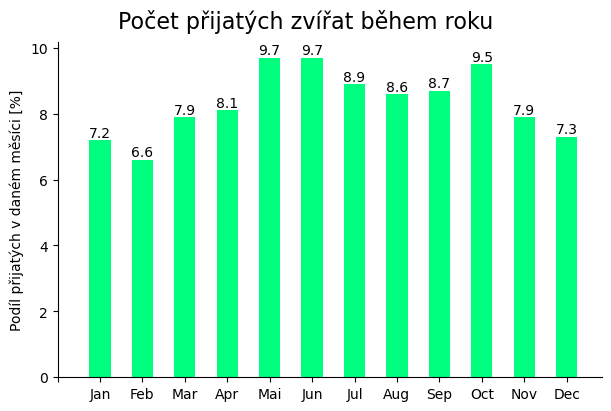

In [58]:
# založení figure
fig = plt.figure(figsize=(6, 4), facecolor='white', constrained_layout=True)
fig.suptitle("Počet přijatých zvířat během roku", fontsize=16)
# vytvoření místa pro graf
ax = fig.add_subplot()
# vytvoření grafu
react = ax.bar(months.index, portion, color="springgreen", width=0.5)
ax.bar_label(react)
# popisky grafu
ax.set_ylabel("Podíl přijatých v daném měsíci [%]")
ax.set_xticks(unit, label)
# smazání zbytečných ohraničení
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# Vlastní otázky

#### 1, Jak jsou rozložená pohlaví mezi zvířaty, která se dostala do útulku?

* Z grafu vyčteme, že v přijatých zvířatech převažují samci. Navíc vyčteme, že kastrovaných zvířat je v obou pohlavích znatelná menšina a to necelá třetina.

In [59]:
# jednotlivá pohlaví s jejich zastoupeními
sexes = df1["Sex upon Intake"].dropna().value_counts()
# popis částí koláče
tmp = sexes.index
labels1 = [tmp[0], tmp[2], tmp[3], tmp[1]] # přeskládání samců a samic
# procentuální vyjádření daného pohlaví
tmp = sexes.values
vals1 = [tmp[0], tmp[2], tmp[3], tmp[1]] # přeskládání samců a samic
vals1 = [round(x, 1) for x in vals1 / sum(vals1) * 100]

In [60]:
labels2 = ["Male", "Female"]
vals2 = [ vals1[0]+vals1[1], vals1[2]+vals1[3] ] # sloučení stejného pohlaví

([<matplotlib.patches.Wedge at 0x7f0d8931ea00>,
 [Text(0.4746017111981878, 0.9923473261553901, 'Intact Male'),
  Text(-1.0214768763220374, 0.40814824652247783, 'Neutered Male'),
  Text(-0.9269045749390944, -0.5923241586808502, 'Spayed Female'),
  Text(0.5299288501811809, -0.963937453233171, 'Intact Female')],
 [Text(0.3451648808714093, 0.7217071462948291, '35.8%'),
  Text(-0.7428922736887544, 0.2968350883799839, '16.3%'),
  Text(-0.6741124181375232, -0.4307812063133456, '13.9%'),
  Text(0.38540280013176786, -0.7010454205332153, '34.0%')])

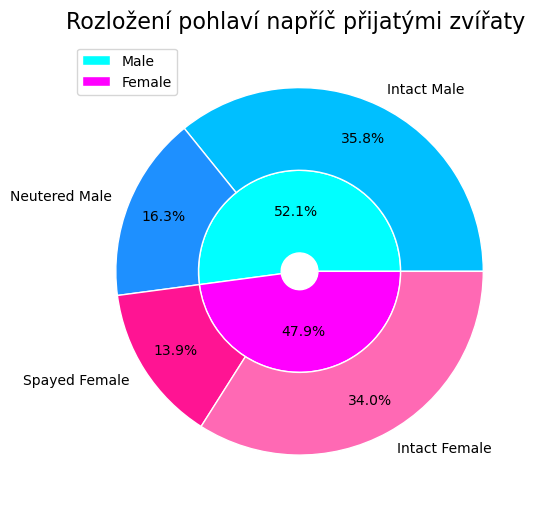

In [61]:
# parametry grafu
size = 0.45
outer_colors = ["deepskyblue", "dodgerblue", "deeppink", "hotpink"]
inner_colors = ["aqua", "fuchsia"]
# nastavení figure
fig = plt.figure(figsize=(6, 5), facecolor='white', constrained_layout=True)
fig.suptitle("Rozložení pohlaví napříč přijatými zvířaty", fontsize=16)
# přidání místa pro graf 1
ax = fig.add_subplot()
# graf 1
ax.pie(vals2, radius=1-size, autopct='%1.1f%%', colors=inner_colors, 
        wedgeprops=dict(width=size, edgecolor='w'))
# pouze legenda grafu 1
ax.legend(labels2, loc="upper left")
# graf 2
ax.pie(vals1, radius=1, autopct='%1.1f%%', labels=labels1, colors=outer_colors, 
        wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.8)

#### 2, Jaká pohlaví si lidé nejčastěji adoptují?

* Z grafu je patrné, že největší podíl adoptovaných zvířat tvoří kastrovaná zvířata.
* Pouze 4% ze všech adoptovaných zvířat byla ta, která kastraci nepodstoupila.

In [62]:
# pohlaví adoptovaných zvířat
sex_adopted = df2[df2["Outcome Type"] == "Adoption"]["Sex upon Outcome"].value_counts()
labels = sex_adopted.index
vals = sex_adopted.values
# podíl daného pohlaví mezi všemi pohlavími
portion = [ round(x / sum(vals) *100, 1) for x in vals ]

In [63]:
# poměry kastrovaných a nekastrovaných zvířat
kastr = [portion[0]+portion[1], portion[2]+portion[3]]
labels2 = ["Katrovaná", "Nekastrovaná"]

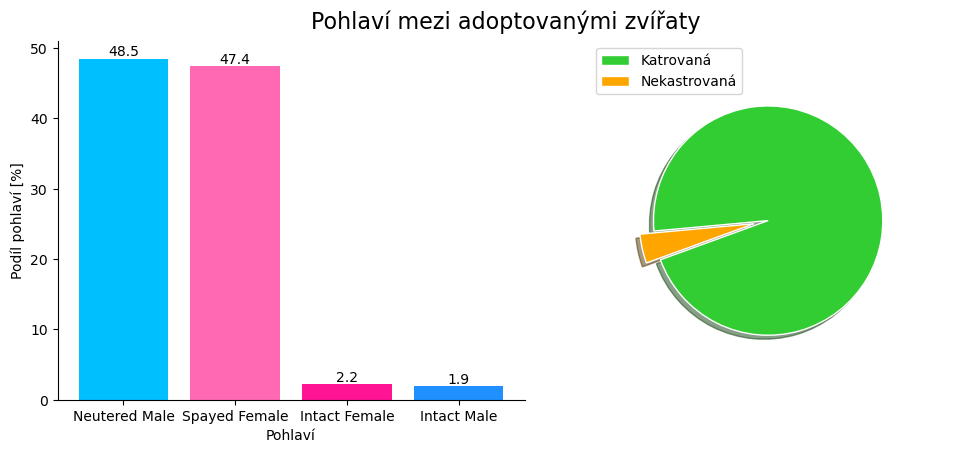

In [64]:
# parametry grafu
colors1 = ["deepskyblue", "hotpink", "deeppink", "dodgerblue"]
colors2 = ["limegreen", "orange"]
explode = (0, 0.1)
# nastavení figure
fig = plt.figure(figsize=(10, 8), facecolor='white', constrained_layout=True)
fig.suptitle("Pohlaví mezi adoptovanými zvířaty", fontsize=16)
# přidání místa pro graf 1
ax = fig.add_subplot(2, 2, 1)
# graf 1
react = ax.bar(labels, portion, color=colors1, width=0.8)
ax.bar_label(react)
# popisky grafu
ax.set_xlabel("Pohlaví")
ax.set_ylabel("Podíl pohlaví [%]")
# smazání zbytečných ohraničení
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

# přidání místa pro graf 2
ax2 = fig.add_subplot(2, 2, 2)
# graf 2
ax2.pie(kastr, colors=colors2, radius=0.8, explode=explode, shadow=True, startangle=200, 
        wedgeprops=dict(width=0.8, edgecolor='w'))
# popisky grafu
# přidání legendy
ax2.legend(labels2, loc="upper left")

#### 3, V jakých měsících byla přijatá zvířata nejčastěji zraněná?

* Z grafu si všimneme, že od prosince do dubna, je poměr přijatých zvířat se zraněním mírně vyšší, než ve zbytku roku.
* Můžeme z toho tedy usuzovat, že zima má vliv na zdraví zvířat, která se dostanou do útulku.

In [65]:
# získání počtu zraněných zvířat v různých měsících
injured = df1[df1["Intake Condition"] == 'Injured']["MonthYear"].value_counts().sort_index()
label = ["", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
unit = np.arange(len(label))
# uložení počtu příjmů zvířat v jednotlivých měsících
months = df1["MonthYear"].value_counts().sort_index()
vals = [ x for x in injured.values ]
months_all = [ x for x in months.values ]
# získání podílu zraněných zvířat v jednotlivých měsících
portion = [ round(vals[i] / months_all[i] * 100, 1) for i in range(len(vals)) ]

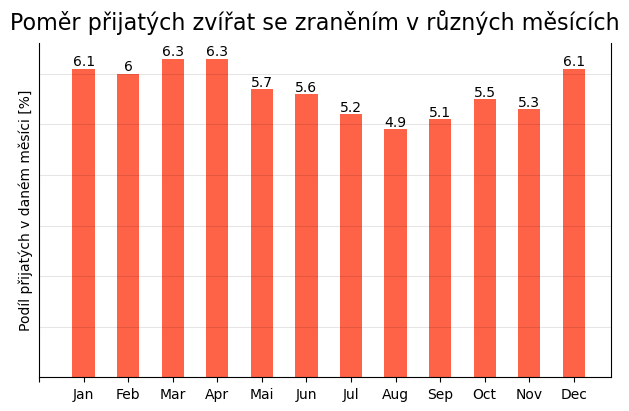

In [66]:
# nastavení figure
fig = plt.figure(figsize=(6, 4), facecolor='white', constrained_layout=True)
fig.suptitle("Poměr přijatých zvířat se zraněním v různých měsících", fontsize=16)
# vytvoření místa pro graf
ax = fig.add_subplot()
# graf
react = ax.bar(injured.index, portion, color="tomato", width=0.5)
ax.bar_label(react)
# popisky grafu
ax.set_xticks(unit, label)
ax.set_ylabel("Podíl přijatých v daném měsíci [%]")
# mřížka
ax.grid(axis='y', color='black', alpha=.1)
# smazání zbytečných ohraničení
ax.spines['top'].set_visible(False) 
# smazání hodnot y osy
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)

### Zdroje:

materiály k předmětu BI-VIZ a BI-ML1

dokumentace matplotlib